In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mymoive.csv',lineterminator = '\n')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
        9827 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.1+ KB


In [ ]:
 Exploration Summary
. We have a dataframe consisting of 9827 rows and 9 columns
. Our dataset looks a bit tidy with no NaNS nor duplicated values
. Realease_Date column needs to be casted into date time and to extract only the year value
. Overview, Original_Language, and poster-Url would not be so useful during analysis, so we will drop them
. there is noticable outliers in popularity column
. Vote_Average better be categorised for proper analysis
. Genre column hascomma separated values and white spaces that needs to be handled and casted into category. 


In [11]:
# Convert datatypes object to datetime

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors = 'coerce')

print(df['Release_Date'].dtypes)

datetime64[ns]


In [12]:
# Convert datatypes object to integer

df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce').astype('Int64')

print(df['Vote_Count'].dtypes)

Int64


In [13]:
# Extract year from Release_date

df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes


dtype('int32')

In [14]:
# Dropping the  columns
cols = ['Overview','Original_Language']
df.drop(cols, axis=1, inplace=True)
df.columns
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,2618.087,122,6.3,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df.drop('Poster_Url\r', axis=1, inplace=True)

# categorizing vote_Average column
### we would cut the vote_Average values and make 4 categories popular, average, below_average, not_popular to describe it more using categorize_col() function provided above

In [19]:
def categorize_col(df, col, labels):
    
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df
    

In [20]:
labels = ['not_popular','below_average','average','popular']

categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [21]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [22]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2411
below_average    2398
Name: count, dtype: int64

In [23]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# we would split genres into a list and then explode our dataframe to have only one genre per row for each moive

In [24]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [25]:
# casting column into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  Int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: Int64(1), category(2), float64(1), int32(1), object(1)
memory usage: 774.5+ KB


In [27]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [28]:
sns.set_style('whitegrid')

# What is the most frequent genre of moives released on netflix.?

In [29]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

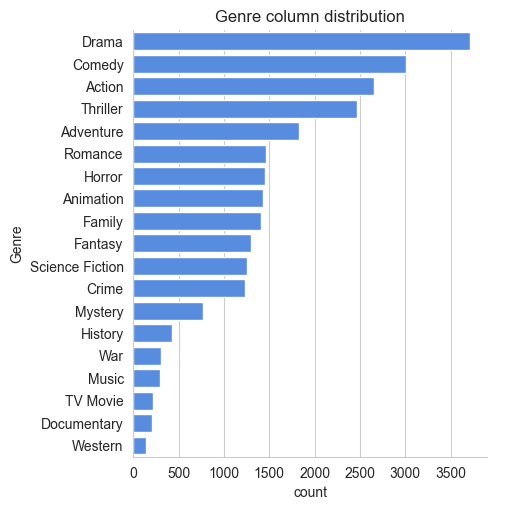

In [30]:
sns.catplot(y ='Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color = '#4287f5')
plt.title('Genre column distribution')
plt.show();

# Which has highest votes in vote avg column

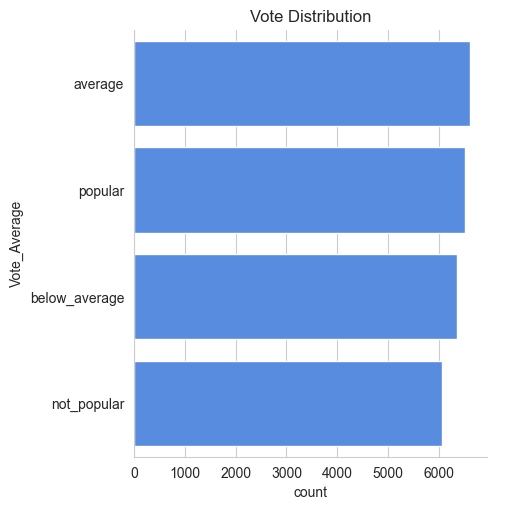

In [31]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = '#4287f5')
plt.title('Vote Distribution')
plt.show()

# What movie got the highest popularity.? what's its genre.?

In [32]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# What movie got the lowest popularity.? what's its genre.?

In [33]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984,Threads,13.354,186,popular,War
25549,1984,Threads,13.354,186,popular,Drama
25550,1984,Threads,13.354,186,popular,Science Fiction


# Which year has the most filmmed movies.?

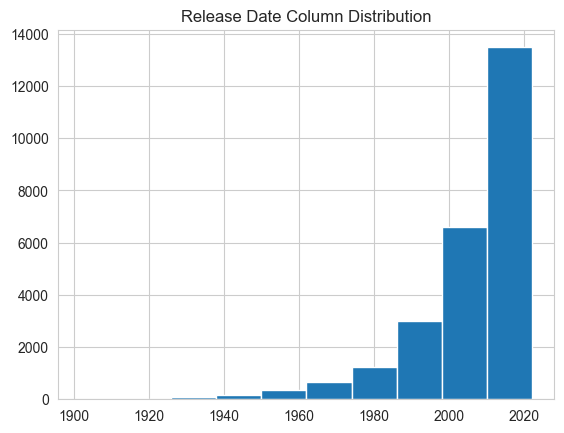

In [34]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

In [ ]:
Conclusion 
Q1: what is the most frequent genre in the dataset.?
    Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

Q2: what genre has highest vote.?
    we have 25.5% of our dataset wtih popular vote (6520 rows). drama again gets the highest popularity among fans by being having more than 18.5% of movies
    popularities.

Q3: what movie got the highest popularity.? what's its gnere.?
    Spider-man: no way home has the highest popularity rate in our dataset and it has genres of action, adventure and science fiction.

Q4: what movie got the lowest popularity.? what's its gnere.?
    The united states, thread has highest lowest rate in our dataset and it has genres of music, drama, war, science fiction and 

Q5: which year has  the most filmmed movie.?
    year 2020 has the highest filmming rate in our dataset.